In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df=df.dropna()
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


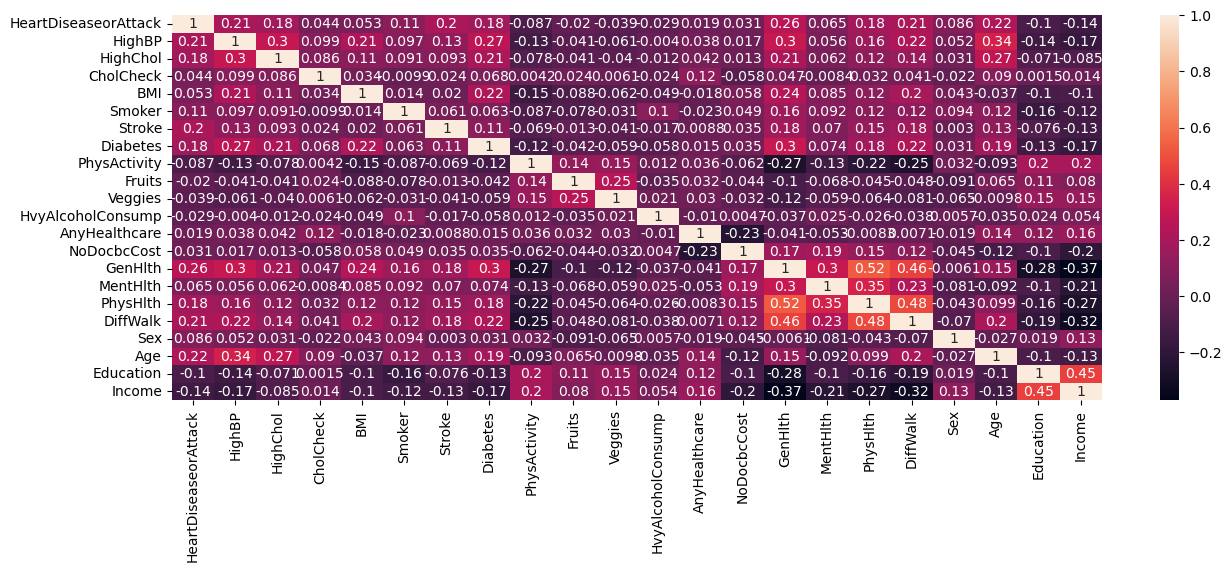

In [3]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [4]:
df=df.drop(['AnyHealthcare','NoDocbcCost','Education','Fruits','Veggies'],axis=1)
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,1.0


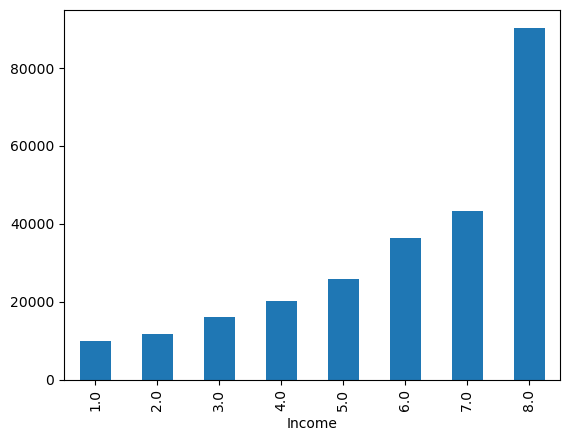

In [5]:
import matplotlib.pyplot as plt
df.groupby('Income').Income.count().plot.bar(ylim=0)
plt.show()

In [6]:
# for column in df.columns:
#     Q1=df[column].quantile(0.25)
#     Q3=df[column].quantile(0.75)
# #     md=df[column].quantile(0.5)
#     lower_limit=Q1-(1.5*(Q3-Q1))
#     upper_limit=Q3+(1.5*(Q3-Q1))
#     print(f"{column}:- Lower limit={lower_limit}, Upper limit={upper_limit}")
#     df=df[(df[column]>lower_limit) | (df[column]<upper_limit)]

In [7]:
x=df.drop(['HeartDiseaseorAttack'],axis=1)
y=df['HeartDiseaseorAttack']

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
x_train.shape

(190260, 16)

In [10]:
y_train.shape

(190260,)

In [11]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\annaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
model.score(x_train,y_train)

0.9072216966256701

[[56646   674]
 [ 5370   730]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     57320
         1.0       0.52      0.12      0.19      6100

    accuracy                           0.90     63420
   macro avg       0.72      0.55      0.57     63420
weighted avg       0.88      0.90      0.88     63420



<Axes: >

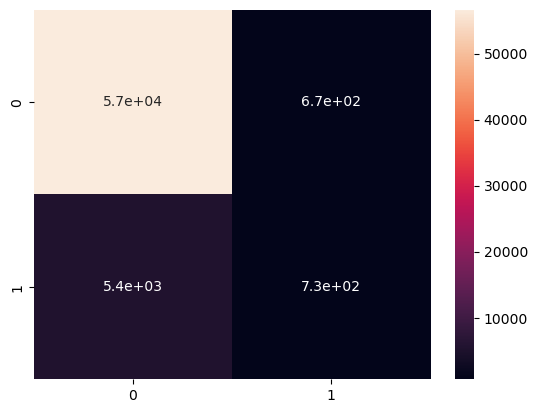

In [13]:
predicted_values=model.predict(x_test)
cm=confusion_matrix(y_test,predicted_values)
print(cm)
print(classification_report(y_test,predicted_values))
sns.heatmap(cm,annot=True)

In [14]:
from sklearn.metrics import accuracy_score
predict = model.predict(x_test)
print("Test accuracy ",accuracy_score(y_test,predict))
print("Train accuracy ",accuracy_score(y_train,model.predict(x_train)))

Test accuracy  0.9046988331756544
Train accuracy  0.9072216966256701


In [15]:
#checking for one test value
value=model.predict(x_test[0:1])
value[0]

1.0

In [16]:
df['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [17]:
#to ask values from users 
def readvalues():
    a=float(input("Do you have high BP?(0 for no and 1 for yes) "))
    b=float(input("Do you have high cholestrol?(0 for no and 1 for yes) "))
    c=float(input("CholCheck?(0 for no and 1 for yes) "))
    d=float(input("Enter your BMI "))
    e=float(input("Are you a smoker?(0 for no and 1 for yes) "))
    f=float(input("Have you suffered a stroke?(0 for no and 1 for yes) "))
    g=float(input("Do you have diabetes?(0 for no and 1 for yes) "))
    h=float(input("Are you physically active?(0 for no and 1 for yes) "))
    i=float(input("Do you drink heavy alcohol?(0 for no and 1 for yes) "))
    j=float(input('GenHlth? (from 1 tp 5 { 1 if excellent genetical health history and 5 if worse}) '))
    k=float(input('Physical health (from 0 to 17{0 if all good 30 if severe}) '))
    l=float(input("mental health (from 0 to 17{0 if all good 30 if severe}) "))
    m=float(input('DiffWalk?(0 for no and 1 for yes) '))
    n=float(input("Sex? (0:F,1:M) "))
    o=float(input('Age? (from 1 to 13 {1 if child/infant, 13 if >60 years}) '))
    p=float(input('Income? (1 to 8) '))
        
    l=[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p]
    data=np.array([l])
    return data
    
    
    

In [18]:
data=readvalues()
value=model.predict(data)
if value[0]==1:
    print("\n\nSuffering from heart disease and high possiblity of heart attack")
else:
    print("\n\nYou are healthy.")

Do you have high BP?(0 for no and 1 for yes) 0
Do you have high cholestrol?(0 for no and 1 for yes) 0
CholCheck?(0 for no and 1 for yes) 1
Enter your BMI 22
Are you a smoker?(0 for no and 1 for yes) 0
Have you suffered a stroke?(0 for no and 1 for yes) 0
Do you have diabetes?(0 for no and 1 for yes) 0
Are you physically active?(0 for no and 1 for yes) 1
Do you drink heavy alcohol?(0 for no and 1 for yes) 0
GenHlth? (from 1 tp 5 { 1 if excellent genetical health history and 5 if worse}) 3
Physical health (from 0 to 17{0 if all good 30 if severe}) 5
mental health (from 0 to 17{0 if all good 30 if severe}) 5
DiffWalk?(0 for no and 1 for yes) 1
Sex? (0:F,1:M) 1
Age? (from 1 to 13 {1 if child/infant, 13 if >60 years}) 5
Income? (1 to 8) 1


You are healthy.


C:\annaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
